In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [150]:
os.getcwd()

'C:\\Users\\vasudha.tanniru\\Documents\\GitHub\\data_projects\\US_Census'

In [151]:
files = glob.glob("states*.csv")
df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)
df = pd.concat(df_list)

In [152]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [153]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [154]:
df.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [155]:
# Start removing the % and $ signs and convert the column data into numeric

In [156]:
df["Income"] = df["Income"].replace({'\$':''},regex = True)

In [157]:
# df["GenderPop"] = df["GenderPop"].str.split('_')

In [158]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"67,264.78",19087135M_19334329F


In [159]:
df["Men"]= df["GenderPop"].str.split('_').str[0]
df["Women"] = df["GenderPop"].str.split('_').str[1]
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"43,296.36",2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"70,354.74",384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"54,207.82",3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"41,935.63",1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"67,264.78",19087135M_19334329F,19087135M,19334329F


In [160]:
df["Men"] = df["Men"].str.replace('M','')

In [161]:
df["Women"] = df["Women"].str.replace('F','')

In [162]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"43,296.36",2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"70,354.74",384160M_349215F,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"54,207.82",3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"41,935.63",1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"67,264.78",19087135M_19334329F,19087135,19334329


In [163]:
df["Men"] = pd.to_numeric(df["Men"])

In [164]:
df["Women"] = pd.to_numeric(df["Women"])

In [165]:
df.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
GenderPop      object
Men             int64
Women         float64
dtype: object

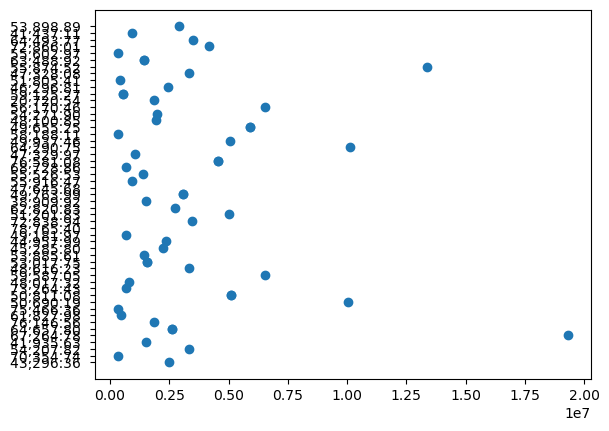

In [166]:
plt.scatter(df["Women"],df["Income"])
plt.show()

In [167]:
df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
Men           0
Women         3
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
df["Women"] = df["Women"].fillna(df["TotalPop"]-df["Men"])

In [170]:
df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
Men           0
Women         0
dtype: int64

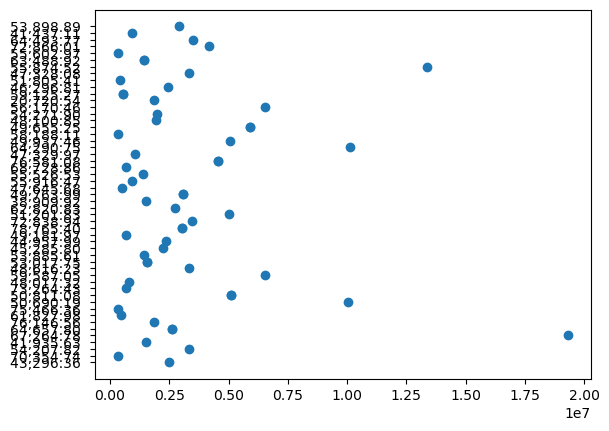

In [171]:
plt.scatter(df["Women"],df["Income"])
plt.show()

In [172]:
# df["Hispanic"] = df["Hispanic"].str.replace('%','')
# df["White"] = df["White"].str.replace('%','')
# df.head()

In [173]:
cols_to_clean = ["Hispanic","White","Black","Native","Asian","Pacific"]
for col in cols_to_clean:
    df[col] = df[col].str.replace('%','',regex=True).astype(float)

In [174]:
df.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income         object
GenderPop      object
Men             int64
Women         float64
dtype: object

In [175]:
df["Pacific"] = df["Pacific"].fillna(0)

In [176]:
df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       0
Income        0
GenderPop     0
Men           0
Women         0
dtype: int64

In [177]:
df.duplicated().sum()

0

In [178]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,"43,296.36",2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,"70,354.74",384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,"54,207.82",3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,"41,935.63",1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,"67,264.78",19087135M_19334329F,19087135,19334329.0


In [179]:
df = df.drop(columns=["Unnamed: 0","GenderPop"])

In [180]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,"43,296.36",2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,"70,354.74",384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,"54,207.82",3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,"41,935.63",1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,"67,264.78",19087135,19334329.0


In [181]:
df_sorted = df.sort_values(by ='Income')
df_sorted.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
4,Puerto Rico,3583073,98.89,0.77,0.09,0.00,0.08,0.00,"20,720.54",1713860,1869213.0
4,Mississippi,2988081,2.84,53.29,41.49,0.39,0.88,0.02,"38,909.92",1451723,1536358.0
4,West Virginia,1851420,1.29,92.18,3.66,0.15,0.68,0.03,"41,437.11",913631,937789.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,"41,935.63",1451913,1506295.0
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,"43,296.36",2341093,2489527.0


In [182]:
df["IncomeRank"] = df["Income"].rank(ascending=False)
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women,IncomeRank
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,"43,296.36",2341093,2489527.0,56.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,"70,354.74",384160,349215.0,10.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,"54,207.82",3299088,3342840.0,31.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,"41,935.63",1451913,1506295.0,57.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,"67,264.78",19087135,19334329.0,12.0


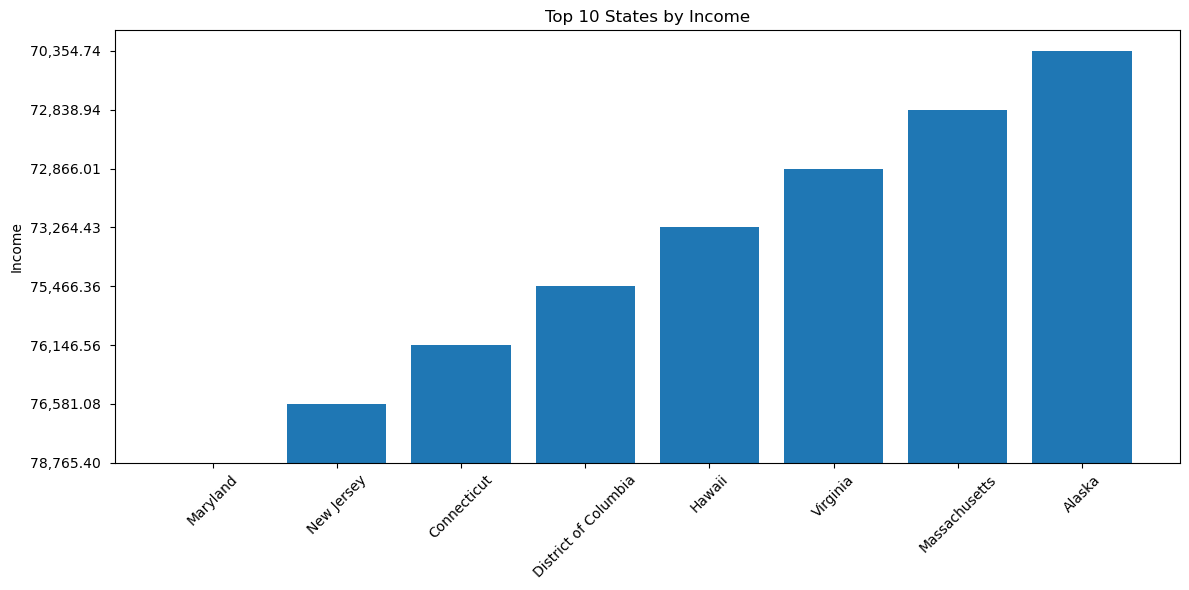

In [183]:
df_sorted = df.sort_values(by='Income',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(df_sorted['State'],df_sorted["Income"])
plt.xticks(rotation = 45)
plt.ylabel("Income")
plt.title("Top 10 States by Income")
plt.tight_layout()
plt.show()

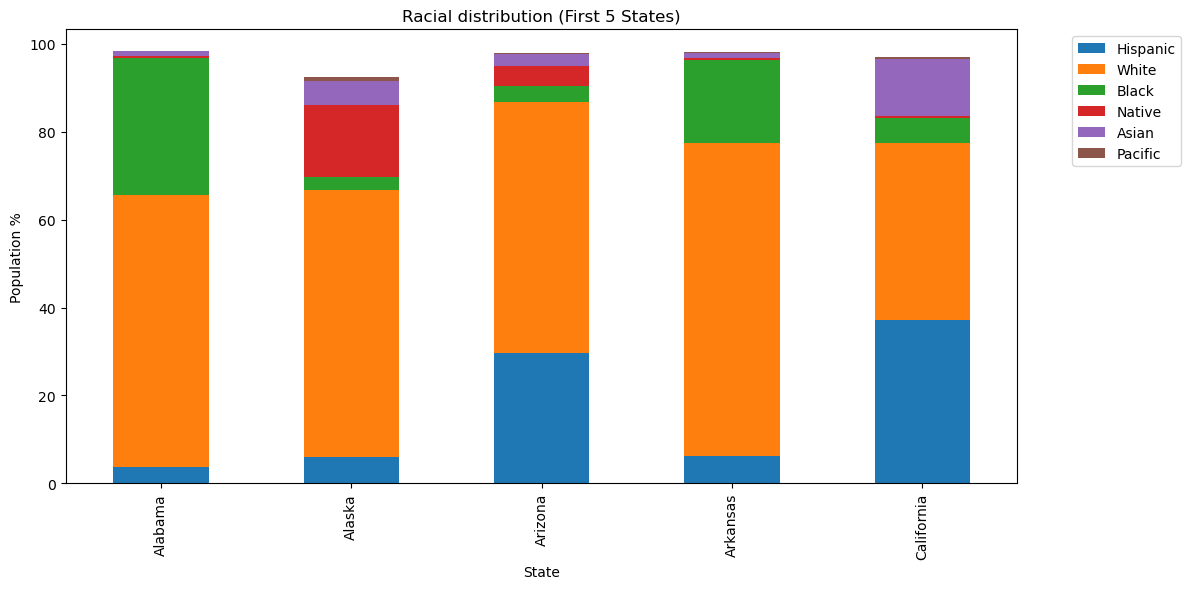

In [184]:
# Race distribution by state
race_cols = ["Hispanic","White","Black","Native","Asian","Pacific"]
df_sample = df.head(5)
df_sample.set_index('State')[race_cols].plot(kind='bar',stacked=True,figsize=(12,6))
plt.ylabel("Population %")
plt.title("Racial distribution (First 5 States)")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.tight_layout()
plt.show()


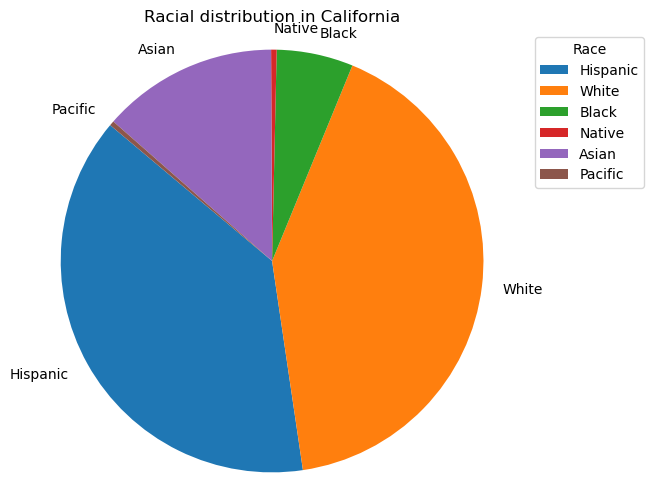

In [185]:
state_data = df[df["State"] == "California"]
plt.figure(figsize = (6,6))
plt.pie(state_data[race_cols].values[0],labels=race_cols,startangle=140)
plt.title("Racial distribution in California")
plt.axis("equal")
plt.legend(race_cols, title="Race",bbox_to_anchor=(1.05,1),loc="upper left")
# plt.tight_layout()
plt.show()
